# Diabetes Predictor: A Machine Learning Approach

## Context

One of the most common chronic diseases in the US, diabetes affects millions of people annually and costs the country's economy a lot of money. Diabetes is a significant chronic condition that impairs a person's capacity to control blood glucose levels, which can shorten life expectancy and lower quality of life. Sugars from various foods are converted during digestion and subsequently released into the bloodstream. The pancreas is prompted to secrete insulin as a result. Insulin assists in making it possible for body cells to use the carbohydrates in the bloodstream as fuel. Either the body doesn't produce enough insulin or it can't use the insulin that is produced as efficiently in those with diabetes.

For those with diabetes, the persistently high amounts of sugar that remain in the bloodstream are linked to complications like heart disease, vision loss, lower limb amputation, and kidney illness. Despite the fact that there is no cure for diabetes, many patients can lessen the negative effects of the condition by using measures including decreasing weight, eating a healthy diet, exercising, and receiving medical care. Predictive models for diabetes risk are valuable tools for the general population and public health officials as early diagnosis can result in lifestyle changes and more effective treatment.

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )
___________________________________________________________________________________________________________________________

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been notified by a doctor, nurse, or other healthcare provider that they have high blood pressure (0,1)

**HighChol** : Have you EVER been informed that you have high blood cholesterol by a doctor, nurse, or other healthcare provider? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI) 

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

In [2]:
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas.api.types import is_numeric_dtype

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Exploratory Data Analysis 

In [4]:
Orginal_data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv", sep=",", encoding='utf-8')

In [5]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv", sep=",", encoding='utf-8')

## Dataset Report

In [52]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Preprocessing

Transform the data to integer

In [6]:
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

**Check null values**

In [7]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**checking unique values in different variables**

In [8]:
uniq_vals = {}
for c in df.columns:
    uniq_vals[c] = df[c].value_counts().shape[0]

pd.DataFrame(uniq_vals, index=['uniq value count']).transpose()

,uniq value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


**Check The Outliers**

Most of the features are categorical and seven features are numerical, lets check the outliers for them in the following sections

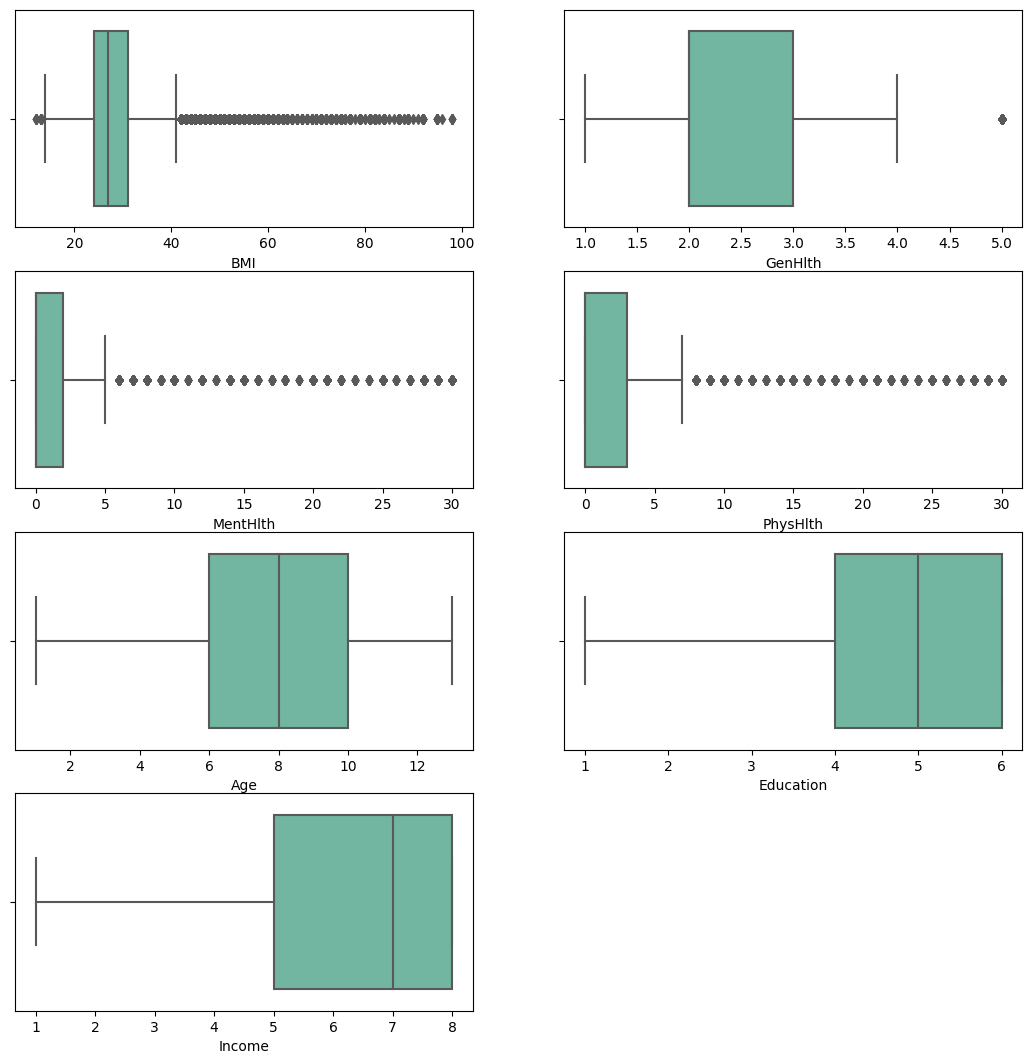

In [10]:
plt.figure(figsize = (13, 13))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data=df ,palette='Set2')
plt.show()

In [57]:
low = .05
high = .95
quant_df = df.quantile([low, high])
df = df[(df["BMI"] > quant_df.loc[low, "BMI"]) & (df["BMI"] < quant_df.loc[high, "BMI"])]
df = df[(df["MentHlth"] > quant_df.loc[low, "MentHlth"]) & (df["MentHlth"] < quant_df.loc[high, "MentHlth"])]
df = df[(df["PhysHlth"] > quant_df.loc[low, "PhysHlth"]) & (df["PhysHlth"] < quant_df.loc[high, "PhysHlth"])]

**Check and drop dublicated data**

In [58]:
df.duplicated().sum()

67

In [59]:
df.drop_duplicates(inplace = True)

In [60]:
df.duplicated().sum()

0

In [61]:
df.shape

(24936, 22)

**Some codes that help us in our EDA**

Replacing 0 into Non-Diabetic and 1 into Diabetic 

adding new column Diabetes_binary_str  

In [62]:
df["Diabetes_binary_str"] = df["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

help us to show the categorical variable 

In [63]:
df2 = df.copy() 

In [64]:
# That help us to show the relation between features clearly

df2.Age[df2['Age'] == 1] = '18 to 24'
df2.Age[df2['Age'] == 2] = '25 to 29'
df2.Age[df2['Age'] == 3] = '30 to 34'
df2.Age[df2['Age'] == 4] = '35 to 39'
df2.Age[df2['Age'] == 5] = '40 to 44'
df2.Age[df2['Age'] == 6] = '45 to 49'
df2.Age[df2['Age'] == 7] = '50 to 54'
df2.Age[df2['Age'] == 8] = '55 to 59'
df2.Age[df2['Age'] == 9] = '60 to 64'
df2.Age[df2['Age'] == 10] = '65 to 69'
df2.Age[df2['Age'] == 11] = '70 to 74'
df2.Age[df2['Age'] == 12] = '75 to 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'No Diabetes'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetes'

df2.HighBP[df2['HighBP'] == 0] = 'No High'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'No High Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

# EDA

Text(0.5, 1.0, 'Correlation Of Feature')

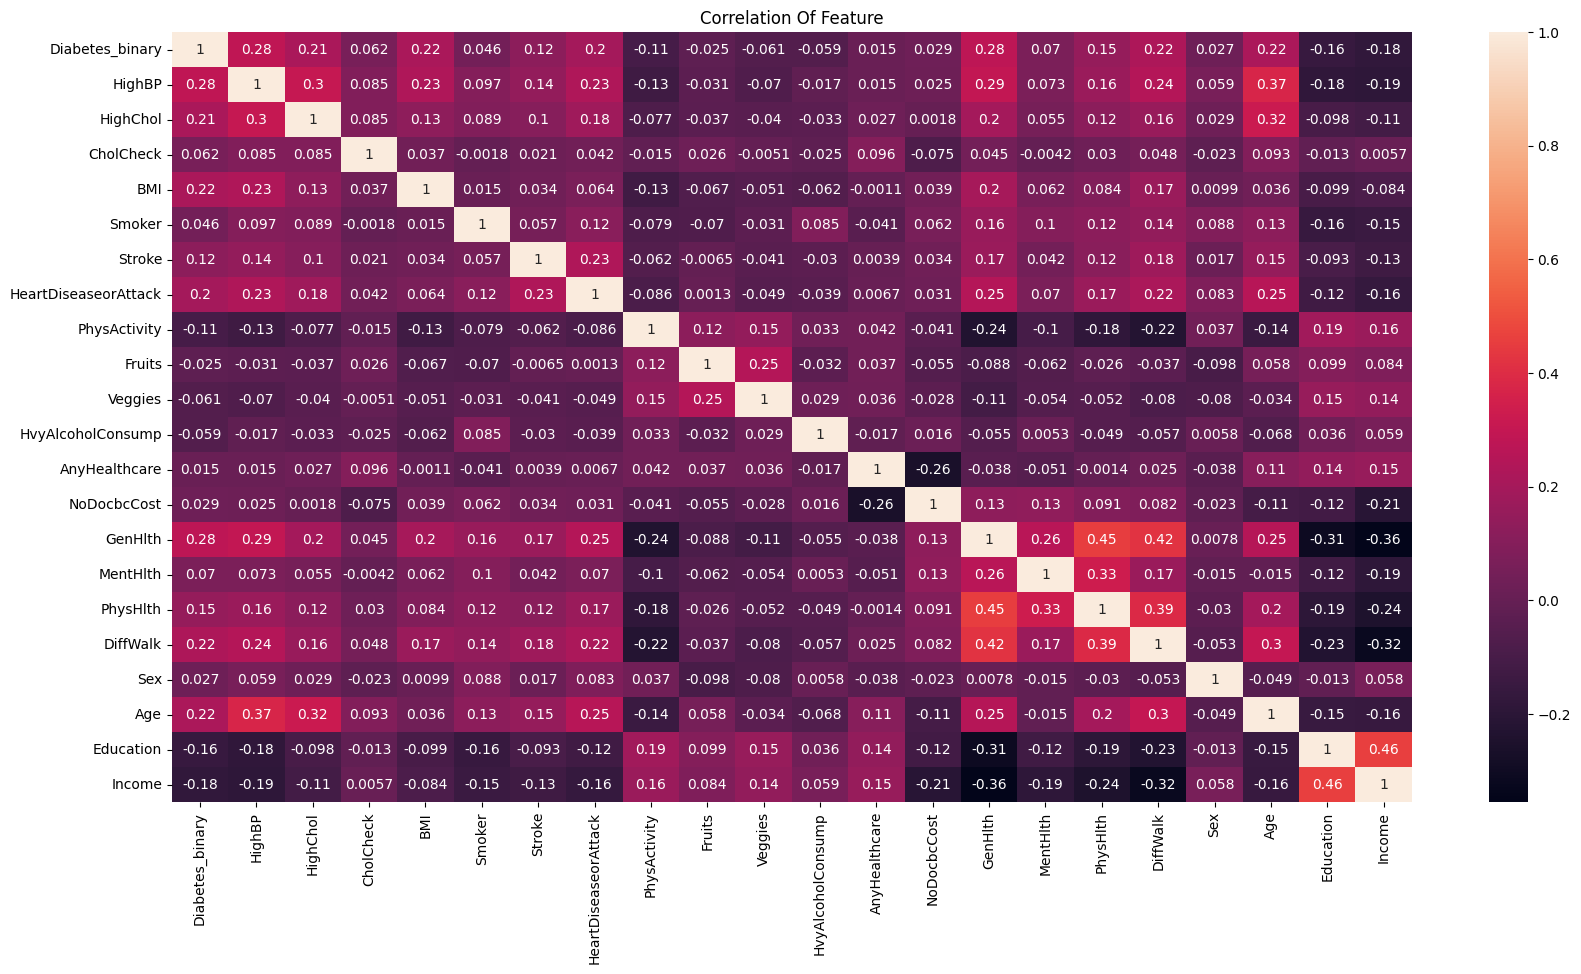

In [65]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Of Feature")

Correlation heatmap show relation between columns:

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correleted with each other => **Positively Correlated**


(GenHlth ,Income ) , (DiffWalk , Income) are highly correleted with each other => **Nagatively Correlated**

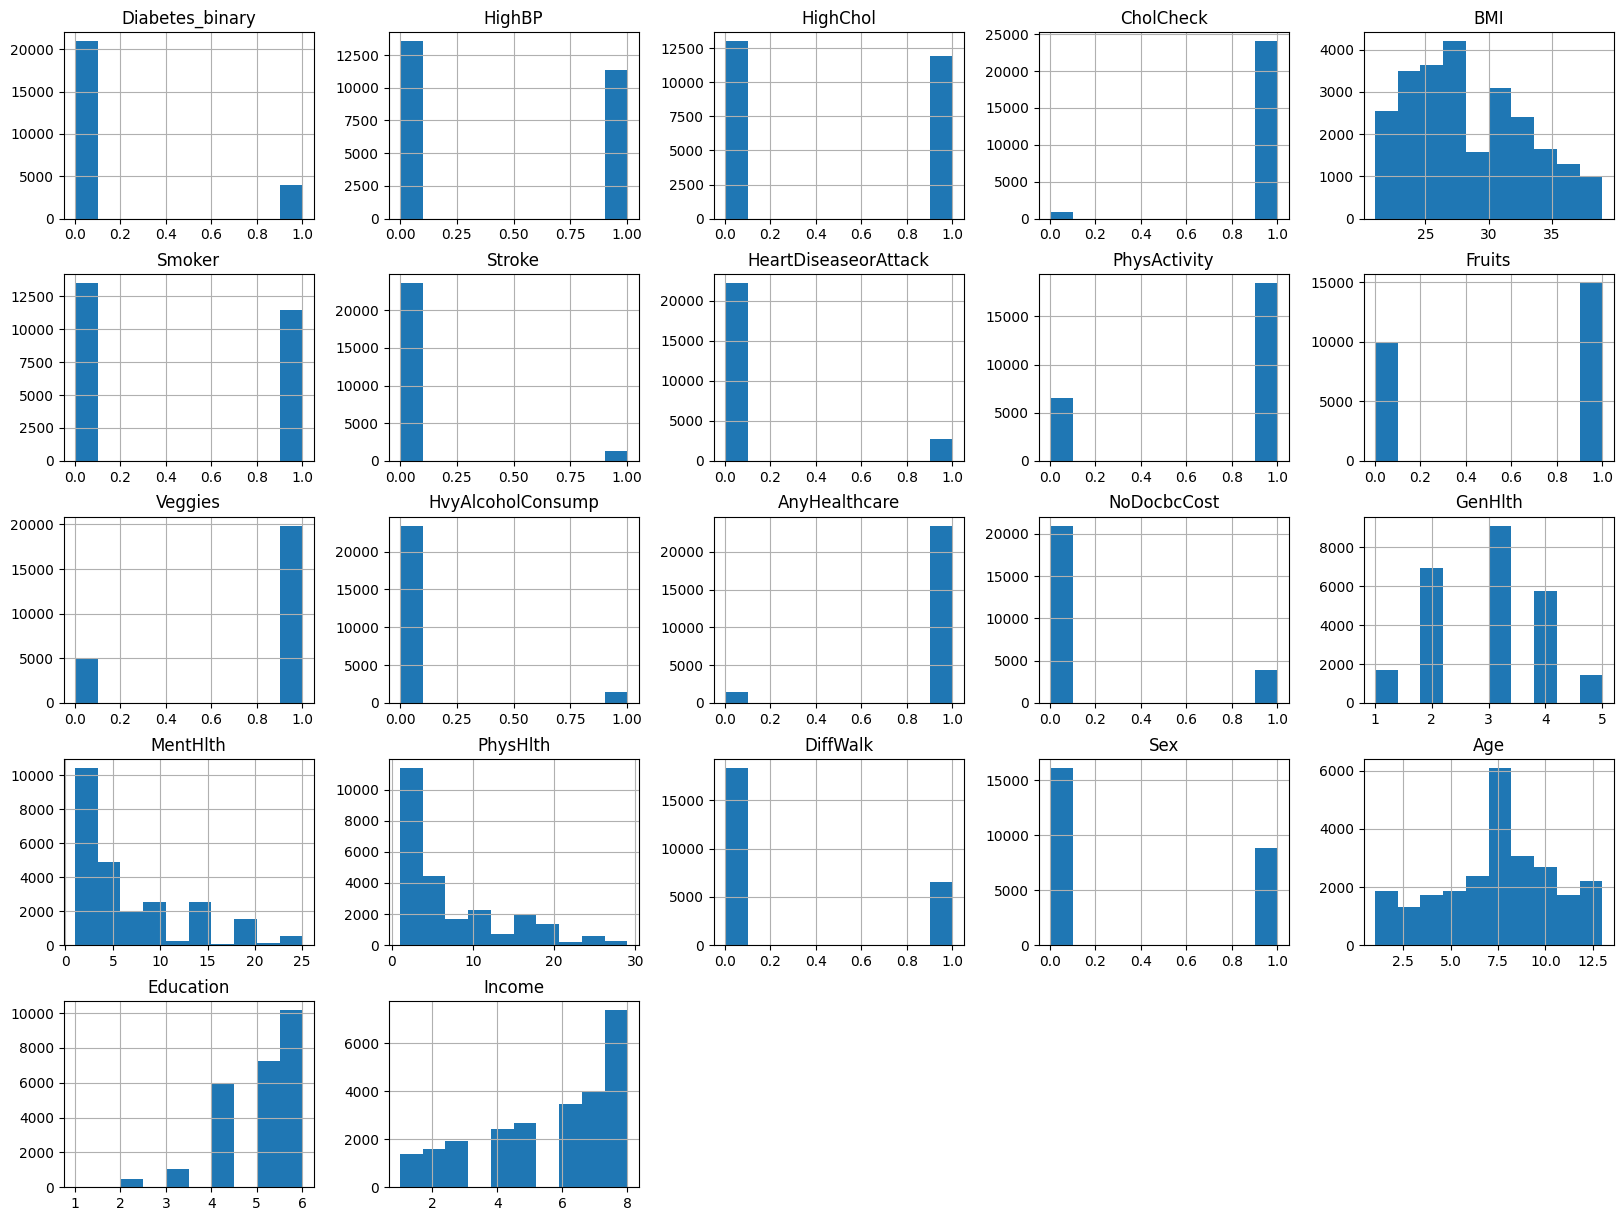

In [66]:
df.hist(figsize=(20,15));

From the plots, we can observe that the Diabetes_binary and Sex are having imbalances in the data

**Visualization Of [Yes - NO] Columns and their relation with the target**

In [67]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [68]:
def create_plot_pivot(df2, x_column):
    df_plot = df2.groupby([x_column, 'Diabetes_binary']).size().reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return df_plot

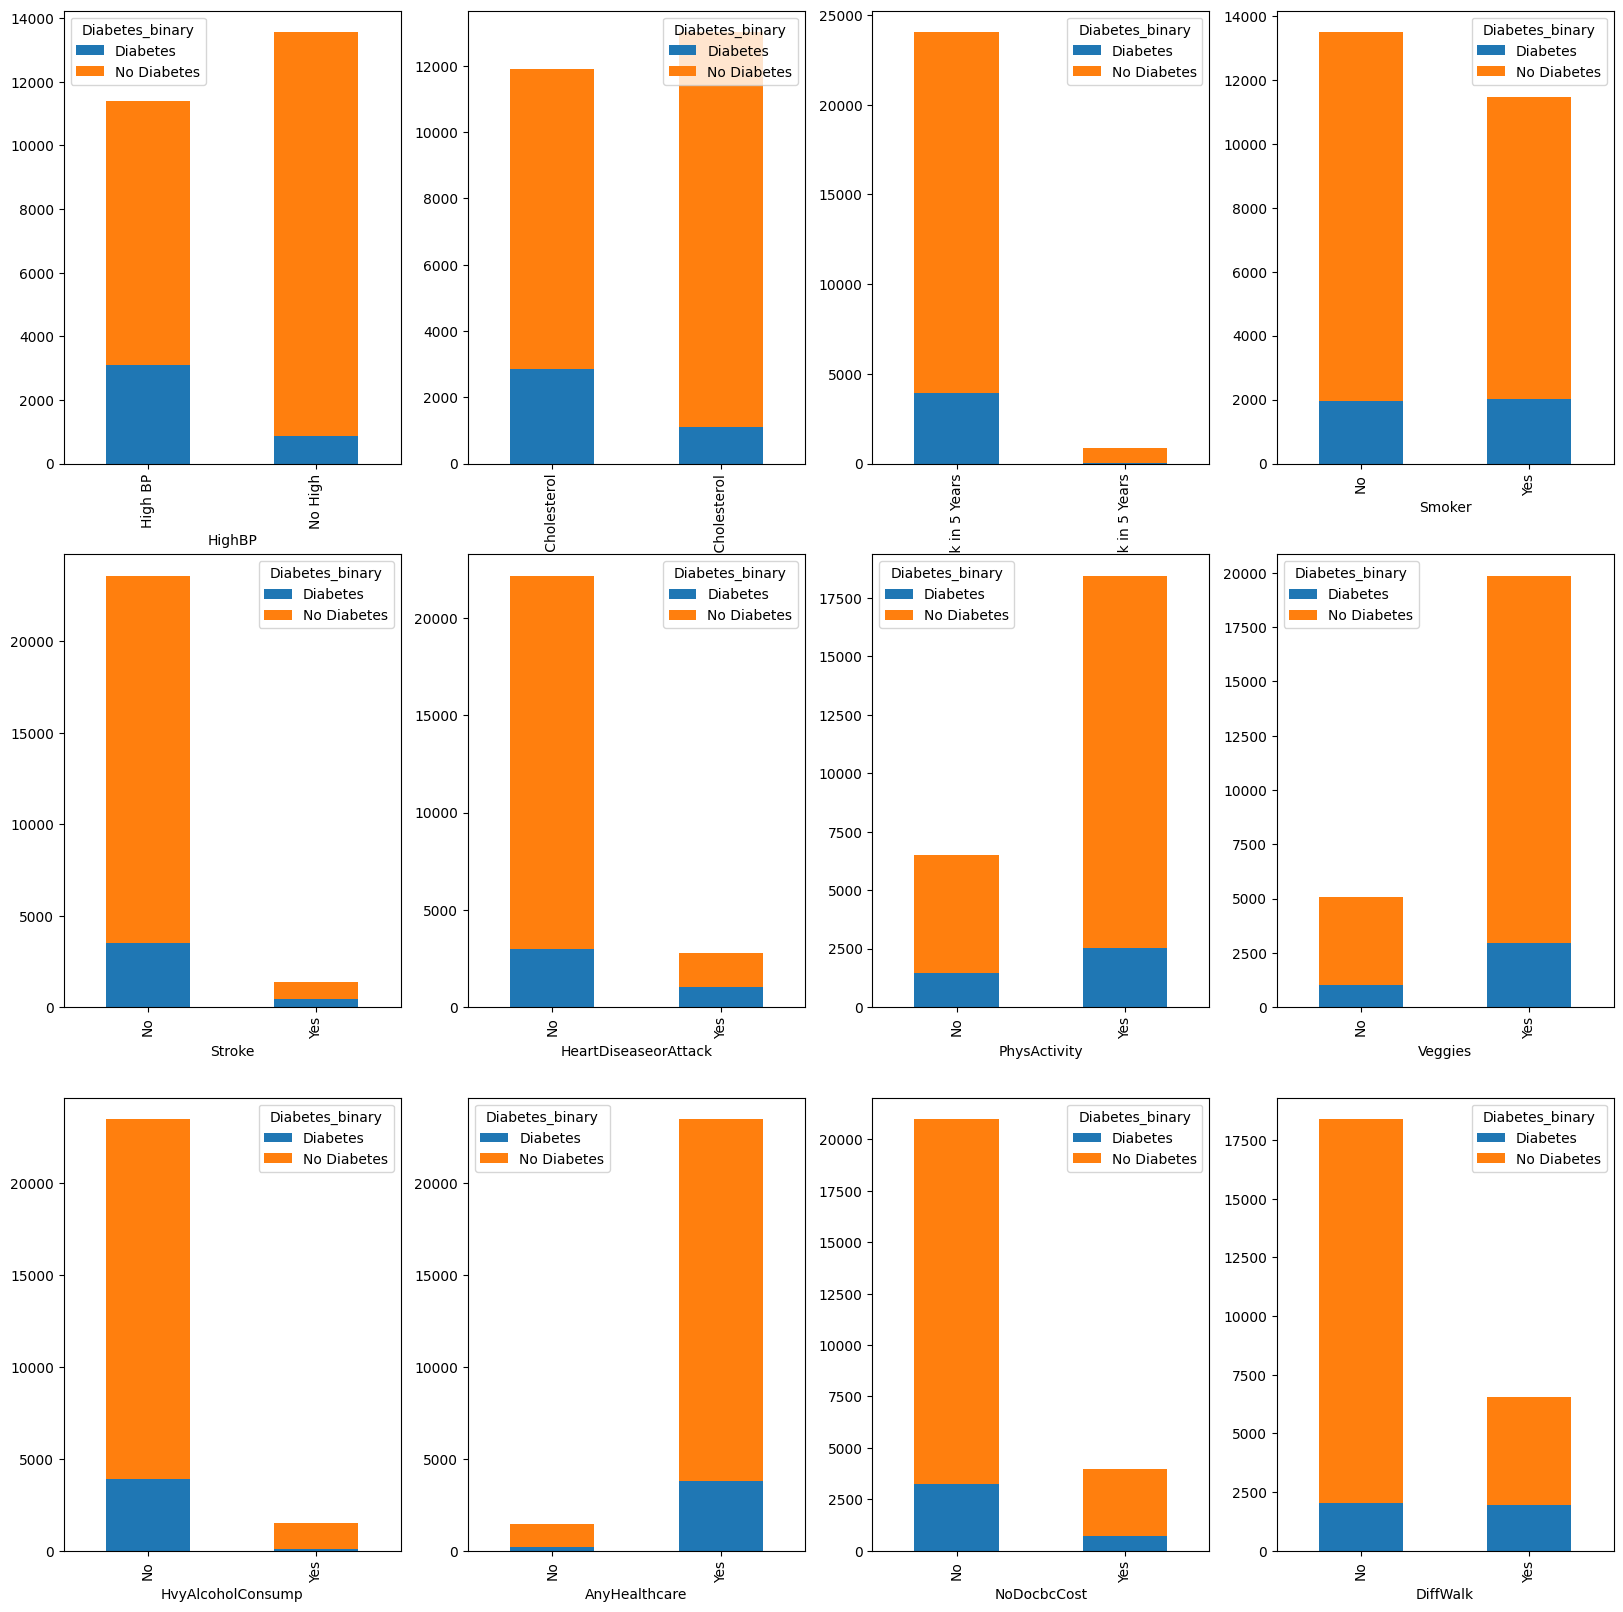

In [69]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df2, cols[i]).plot(kind='bar', stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

Observations

1. High BP and Chelostrol shows a postive sign of getting diabetes

2. Presence of Diabeties results in heart disease and stroke.

3. Eating vegitables doesn't show any impact on getting the diabeties, this might not be exactly true in the real time scenario, there could be a problem with the survey

**The feature "Age" and it's relation with the target**

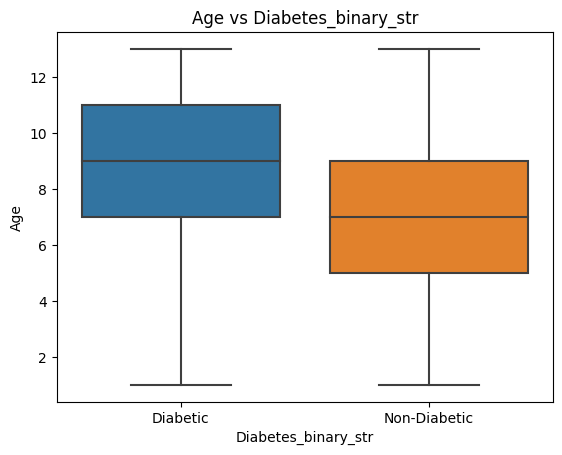

In [70]:
sns.boxplot(x='Diabetes_binary_str', y='Age', data=df)
plt.title('Age vs Diabetes_binary_str')
plt.show()

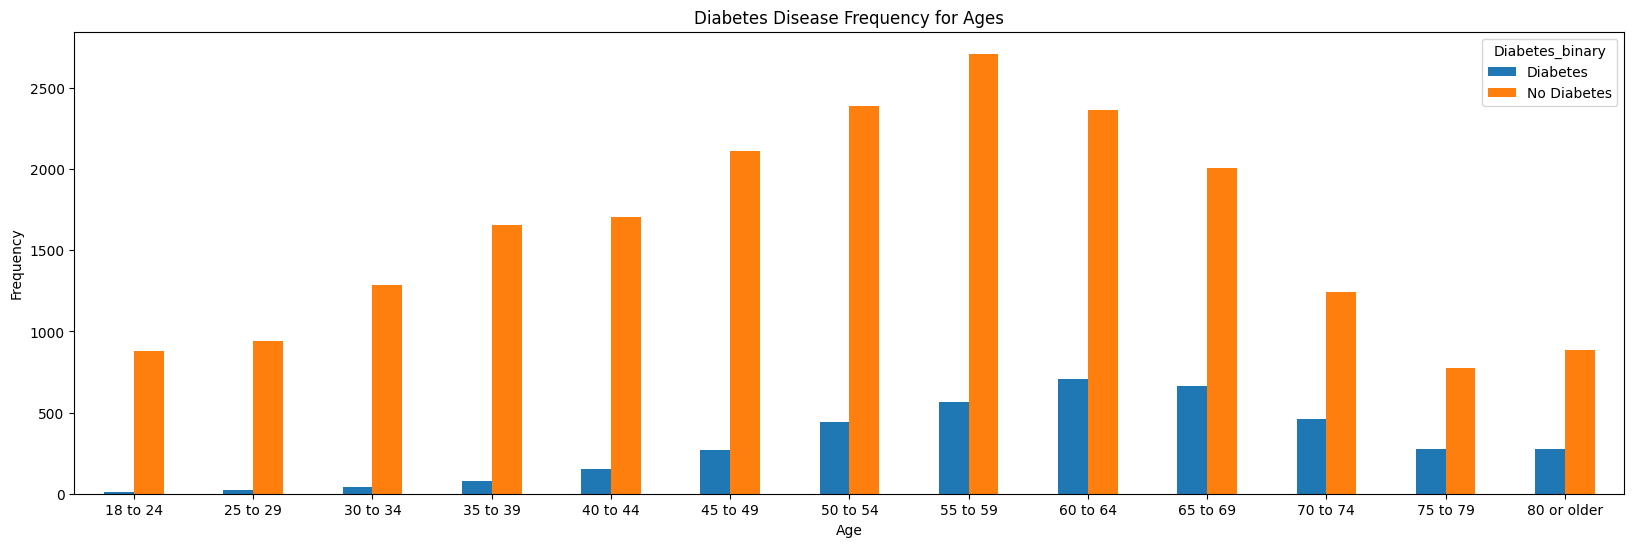

In [71]:
pd.crosstab(df2.Age, df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

**The feature "Education" and it's relation with the target**

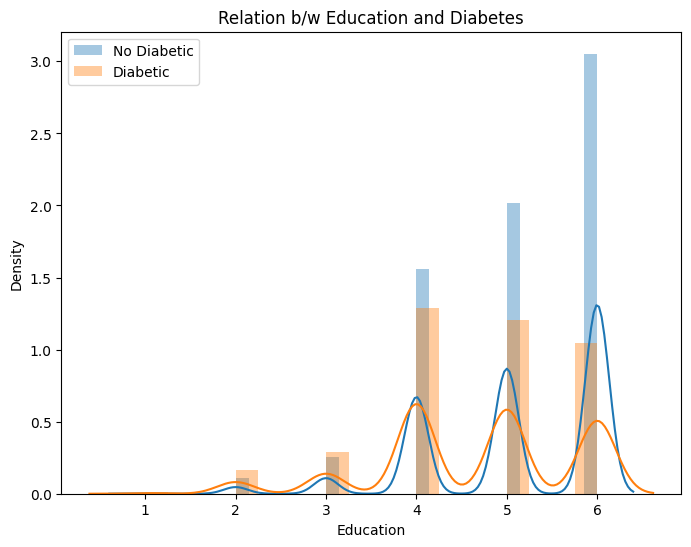

In [72]:
plt.figure(figsize=(8,6))

sns.distplot(df.Education[df.Diabetes_binary == 0], label="No Diabetic" )
sns.distplot(df.Education[df.Diabetes_binary == 1], label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

As the education increases, the count of presence of diabetes has been decreased, but it not much significant.

**The feature "income" and it's relation with the target**

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

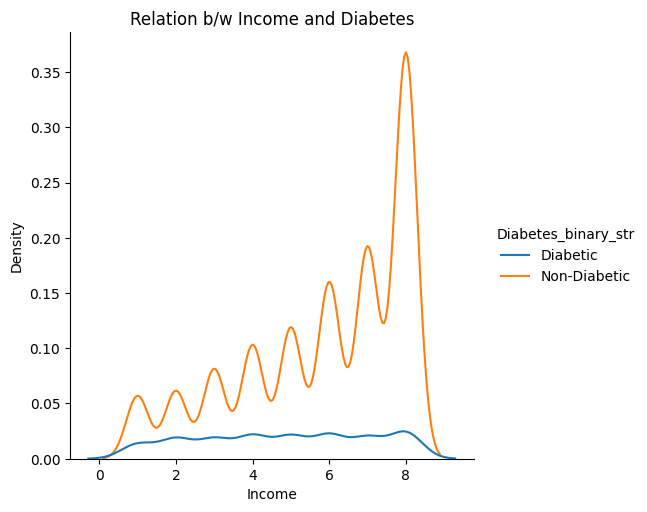

In [73]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

The non diabetic count increased as the income increases. Where as the diabetic count is a contant across all the income groups.

**The feature "MentHlth" and it's relation with the target**

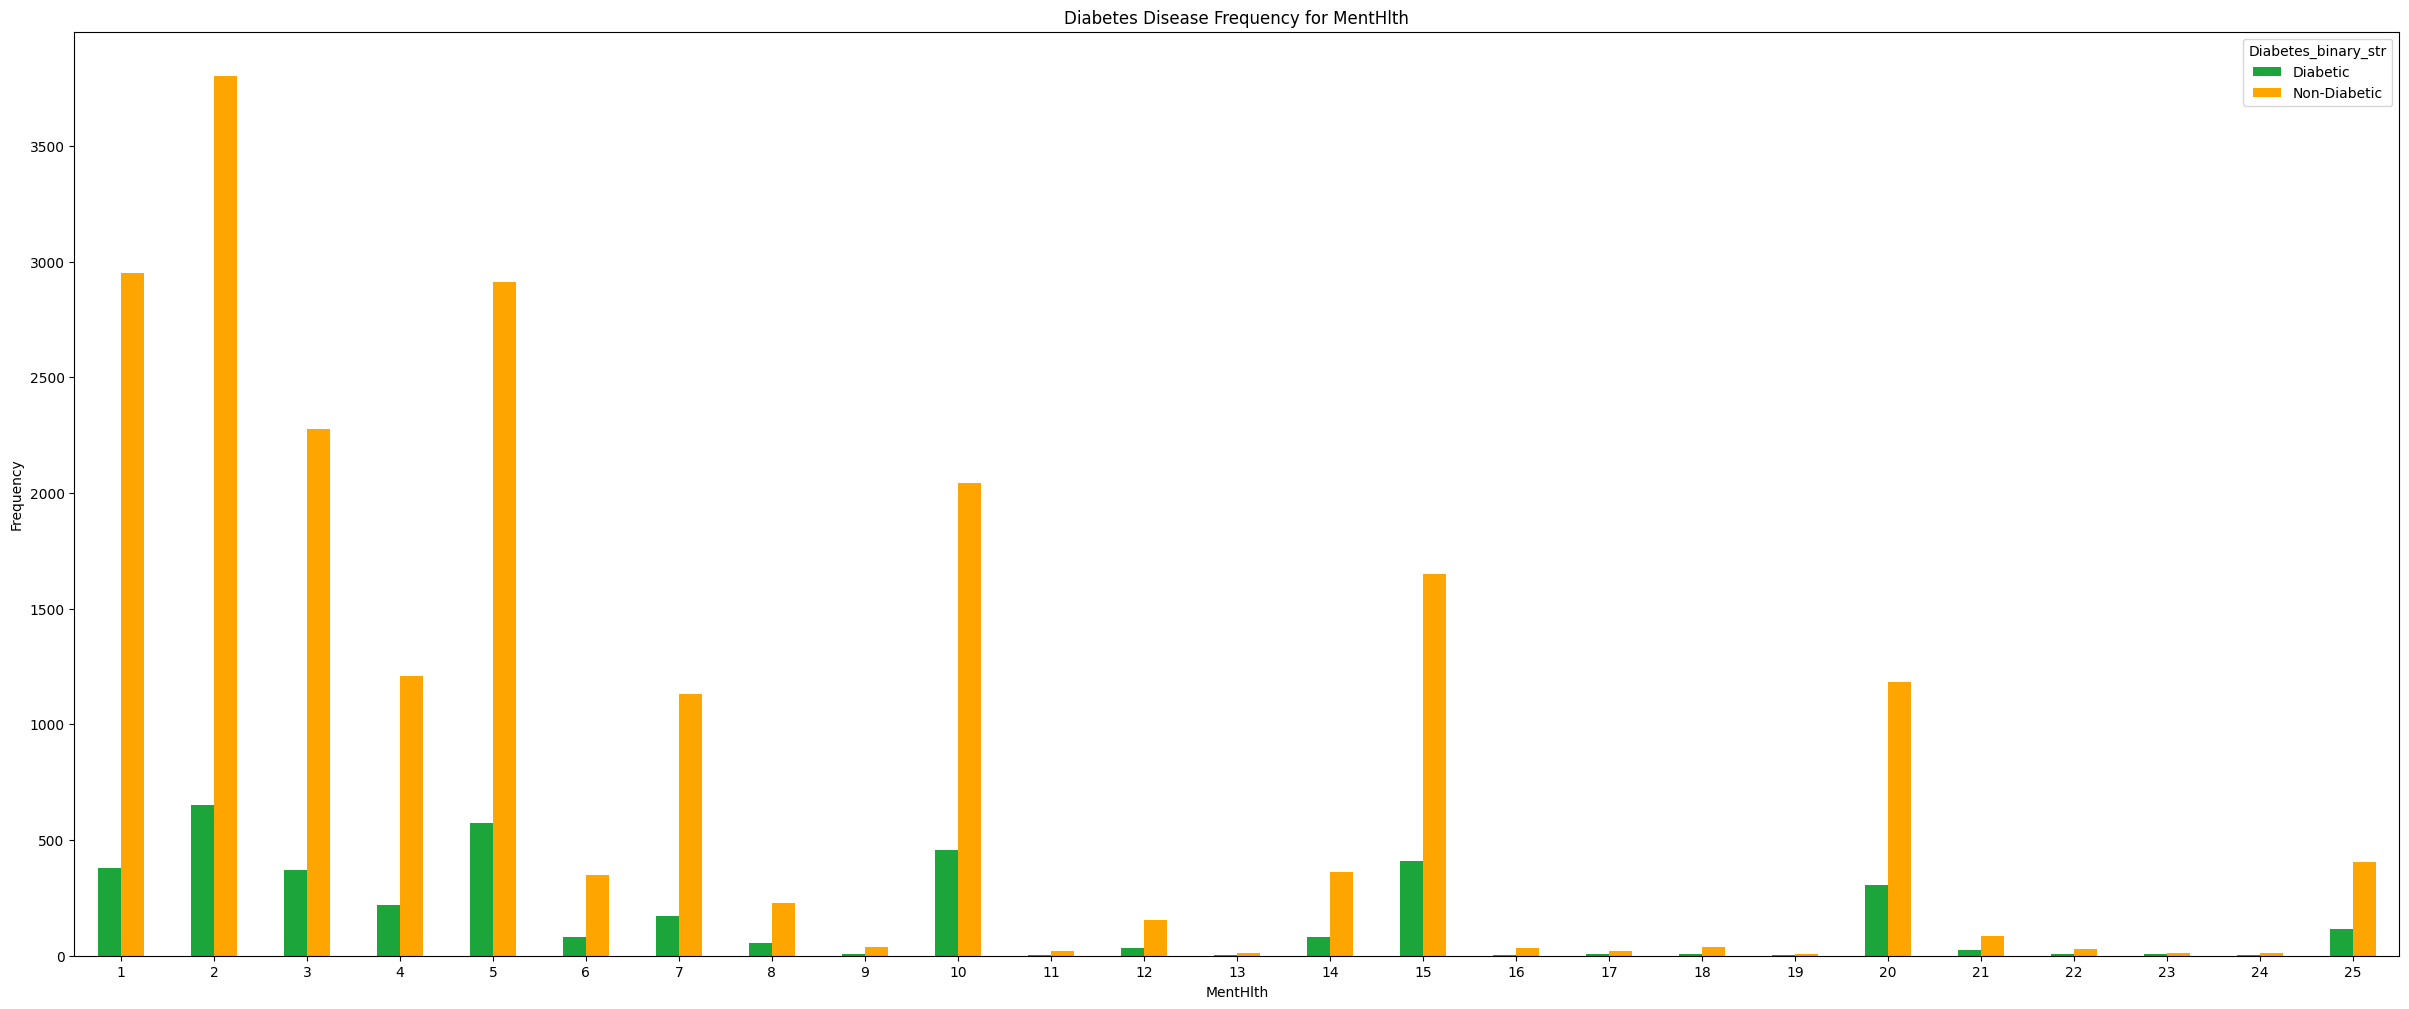

In [74]:
pd.crosstab(df.MentHlth, df.Diabetes_binary_str).plot(kind="bar", figsize=(30,12), color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

**The feature "PhysHlth" and it's relation with the target**

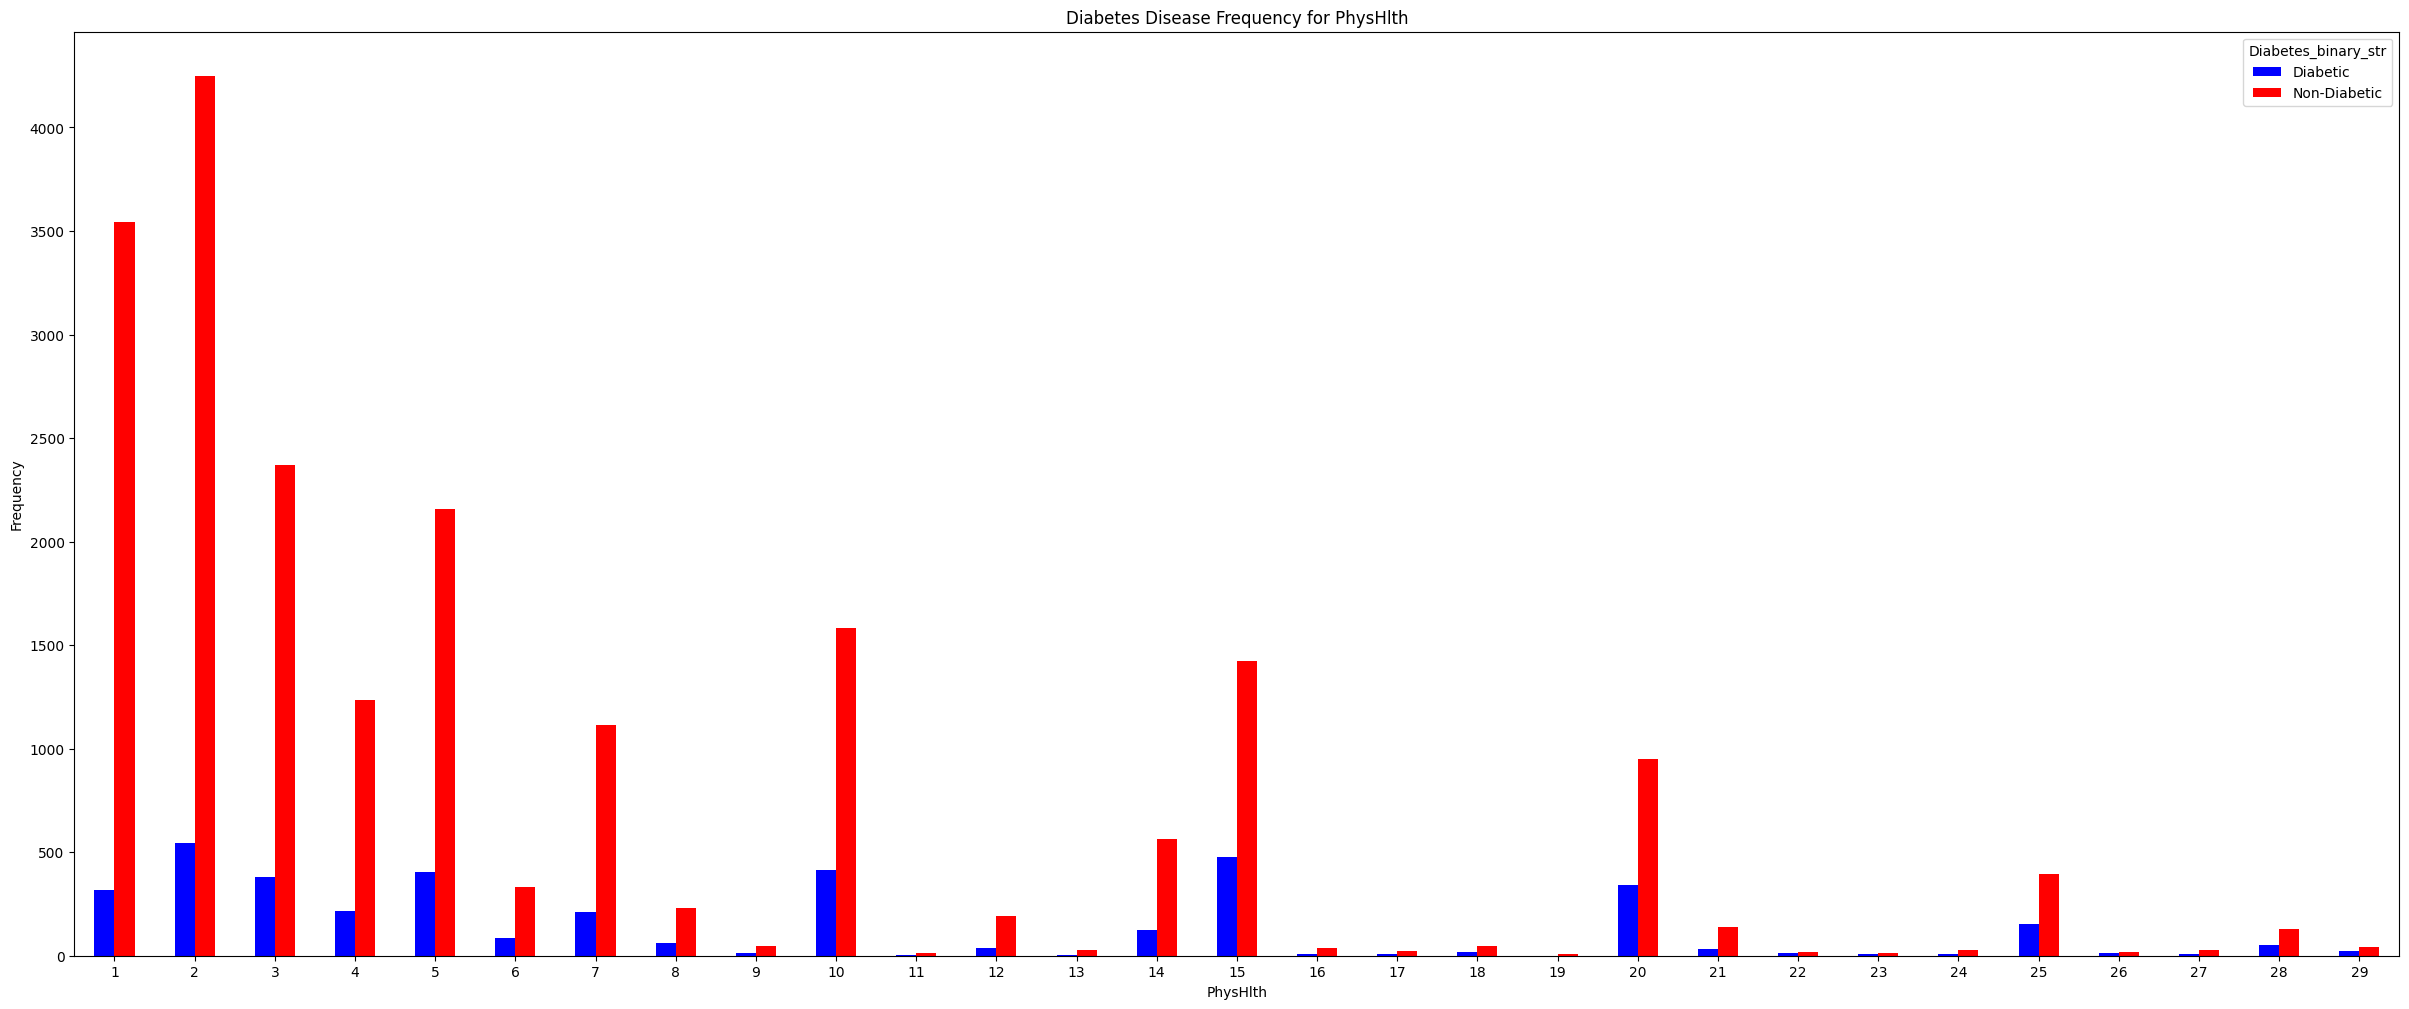

In [75]:
pd.crosstab(df.PhysHlth, df.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

**The feature "GenHlth" and it's relation with the target**

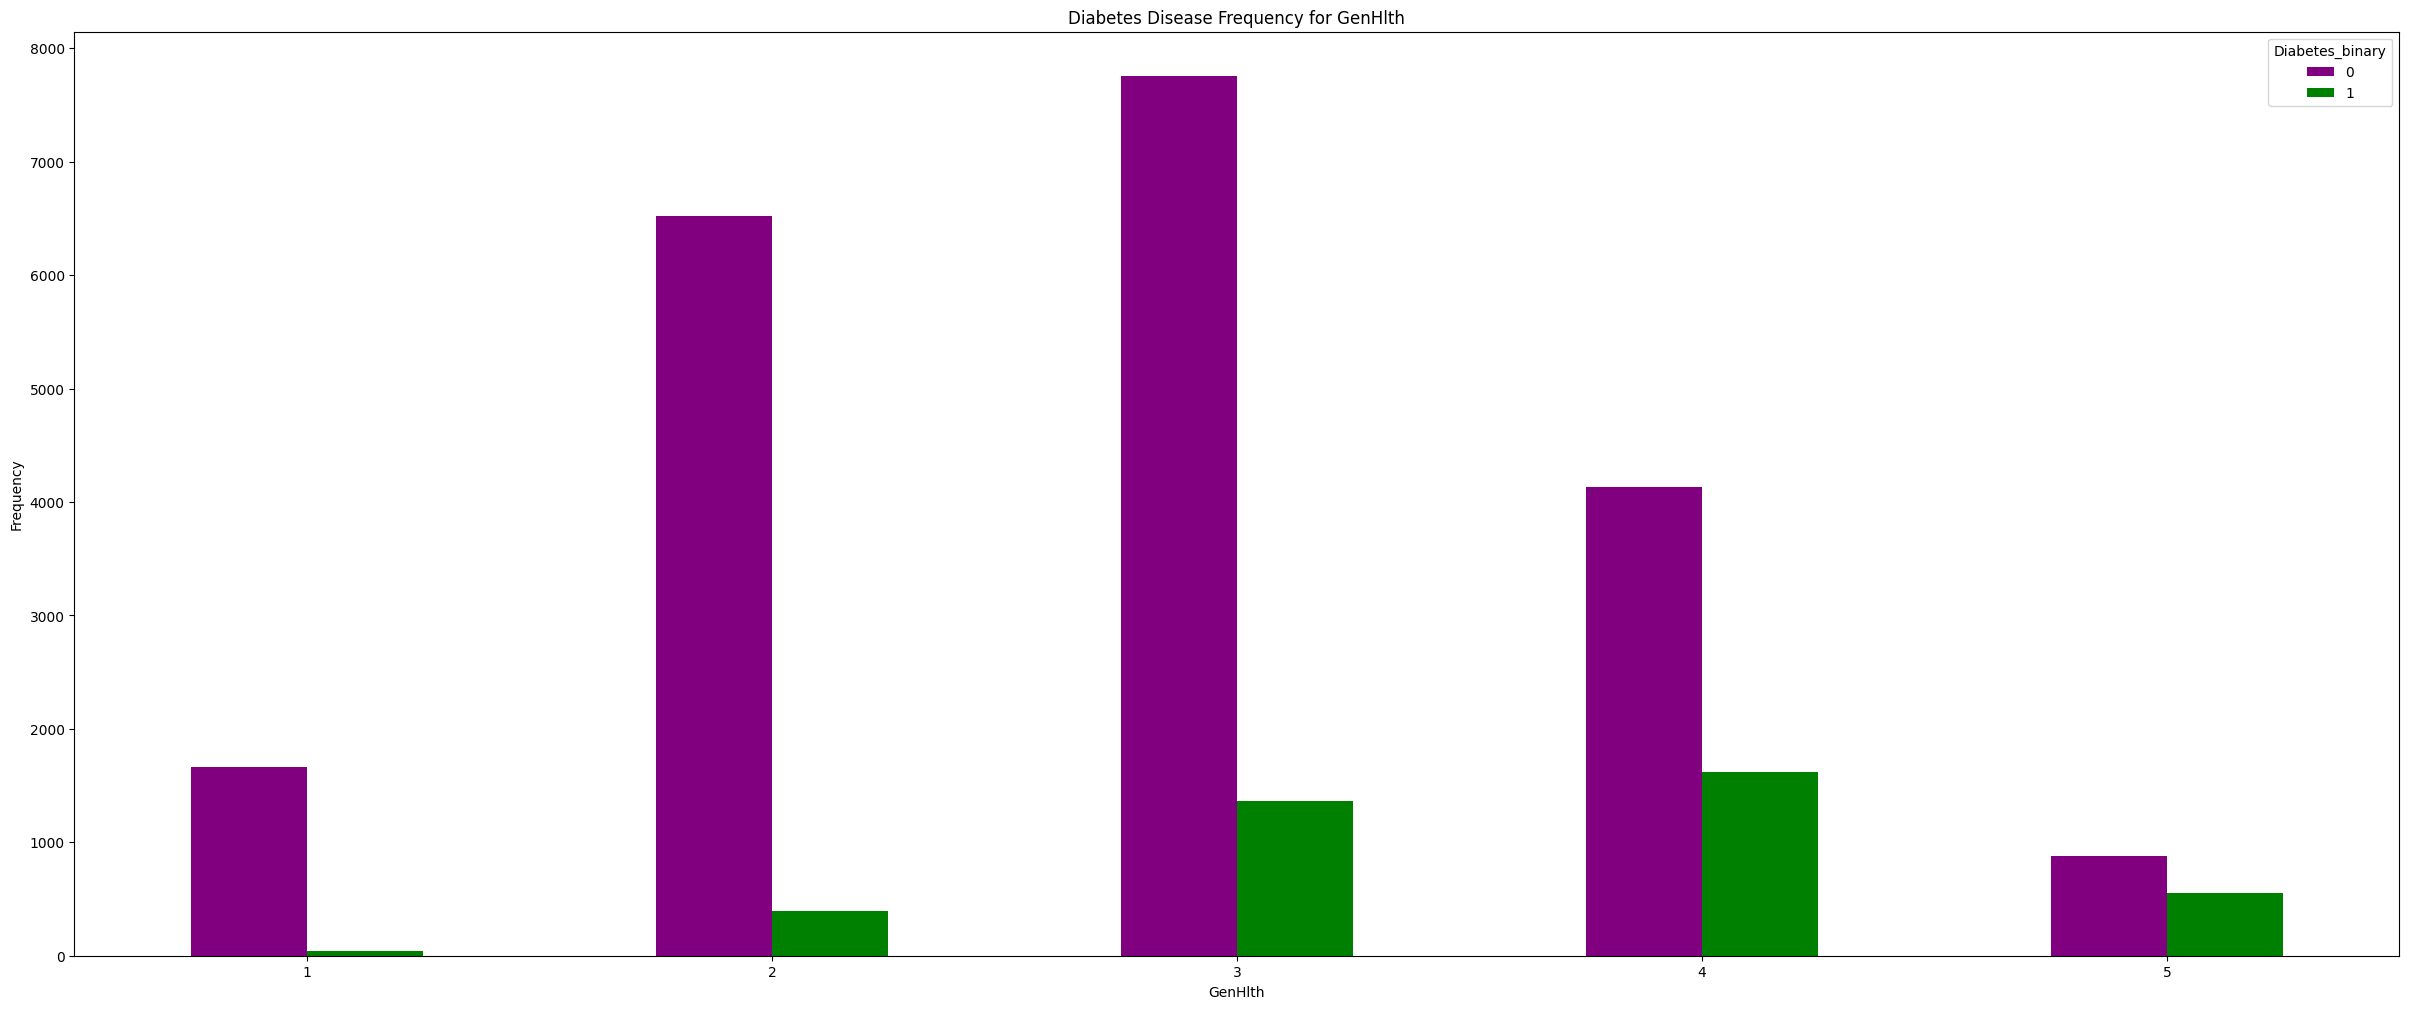

In [76]:
pd.crosstab(df.GenHlth, df.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

not many peolpe have "5" and "4" of GenHlth  ,but they have diabetes !!!

# Feature Selections

**With correlation**

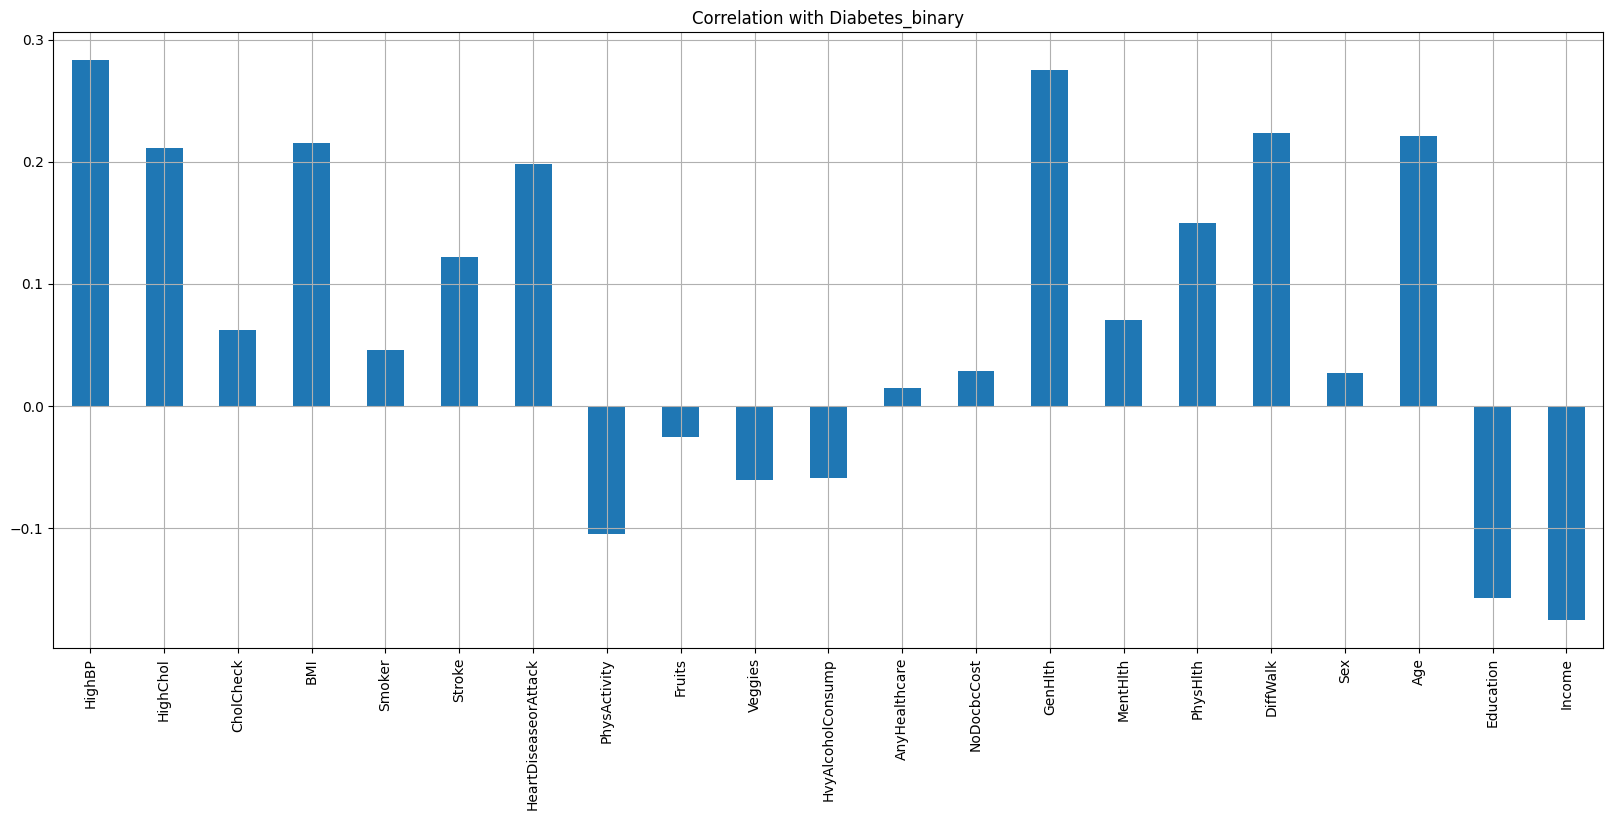

In [77]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary");

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

**VIF Multi Collinearity Test**

In [78]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(Orginal_data)
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   116.856706
Diabetes_binary           1.193120
HighBP                    1.344502
HighChol                  1.180932
CholCheck                 1.033501
BMI                       1.160280
Smoker                    1.091872
Stroke                    1.081612
HeartDiseaseorAttack      1.175776
PhysActivity              1.157396
Fruits                    1.112540
Veggies                   1.112397
HvyAlcoholConsump         1.025418
AnyHealthcare             1.113209
NoDocbcCost               1.144200
GenHlth                   1.821914
MentHlth                  1.239497
PhysHlth                  1.623288
DiffWalk                  1.536636
Sex                       1.075748
Age                       1.354954
Education                 1.326495
Income                    1.505649
dtype: float64


In [79]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

**Chi Square**

In [80]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([df_columns, df_scores], axis=1)
f_Scores.columns = ['Feature', 'Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [81]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


There are the features which we will use in our model

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us 

In [82]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]
df.drop(colomns, axis=1, inplace=True)

# Data Splitting 

In [83]:
X = df.drop("Diabetes_binary",axis=1)
Y = df["Diabetes_binary"]

In [84]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.3 , random_state=42)

# Data Scalling

In [85]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)

In [86]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X_test = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)

# Modeling

**Rondom Forest**

In [87]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [88]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.9040
Test set score: 0.8392


In [89]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.16080737869268813
Root Mean Squared Error : 0.40100795340328116


In [90]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6296
           1       0.48      0.16      0.24      1185

    accuracy                           0.84      7481
   macro avg       0.67      0.56      0.58      7481
weighted avg       0.80      0.84      0.80      7481



Calculating and plotting the confusion matrix

### Confusion Matrix

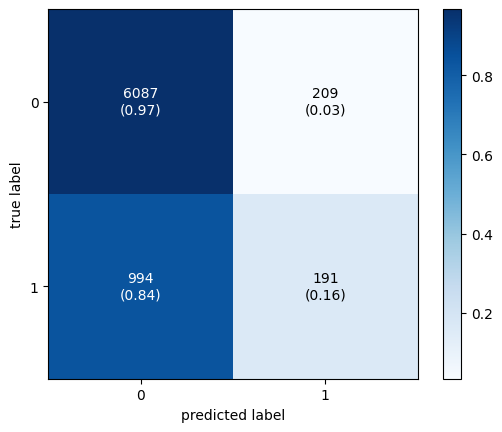

In [91]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Model interpretability

In [92]:
import shap

In [93]:
shap.initjs()

In [94]:
row = X_test.iloc[[5]]
tree_shap_explainer = shap.TreeExplainer(rf)
tree_shap_values_row = tree_shap_explainer.shap_values(row)
tree_shap_values = tree_shap_explainer.shap_values(X_test)

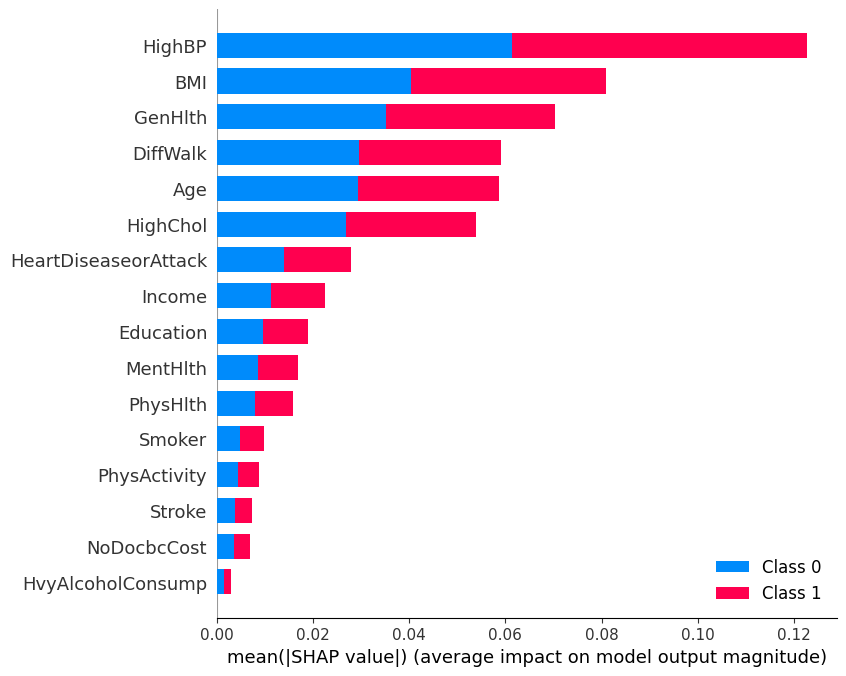

In [95]:
shap.summary_plot(tree_shap_values, X_test)

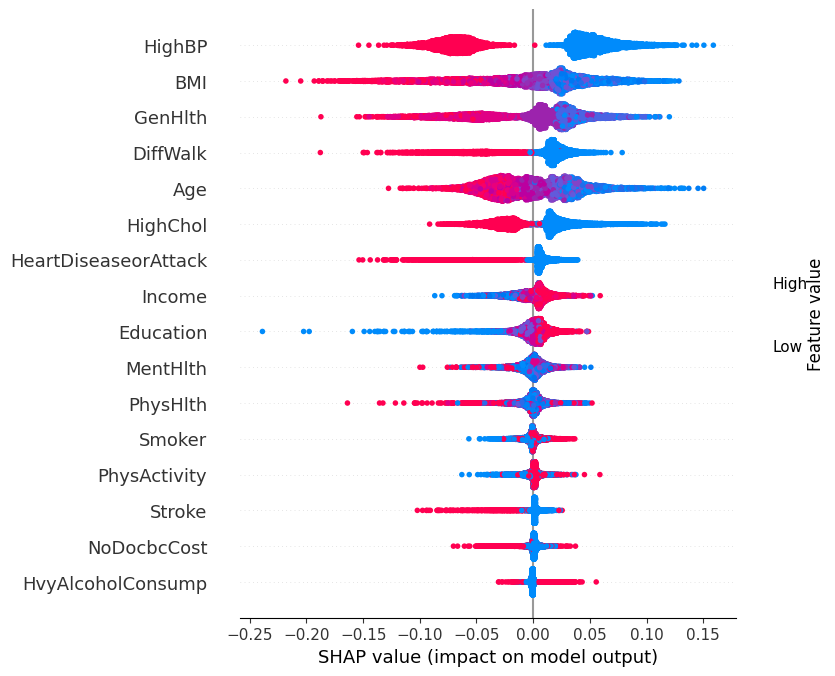

In [96]:
shap.initjs()
shap.summary_plot(tree_shap_values[0], X_test, feature_names=X_test.columns)

High BMI resulted in Diabetes

Acohol consumption doesn't have much significance

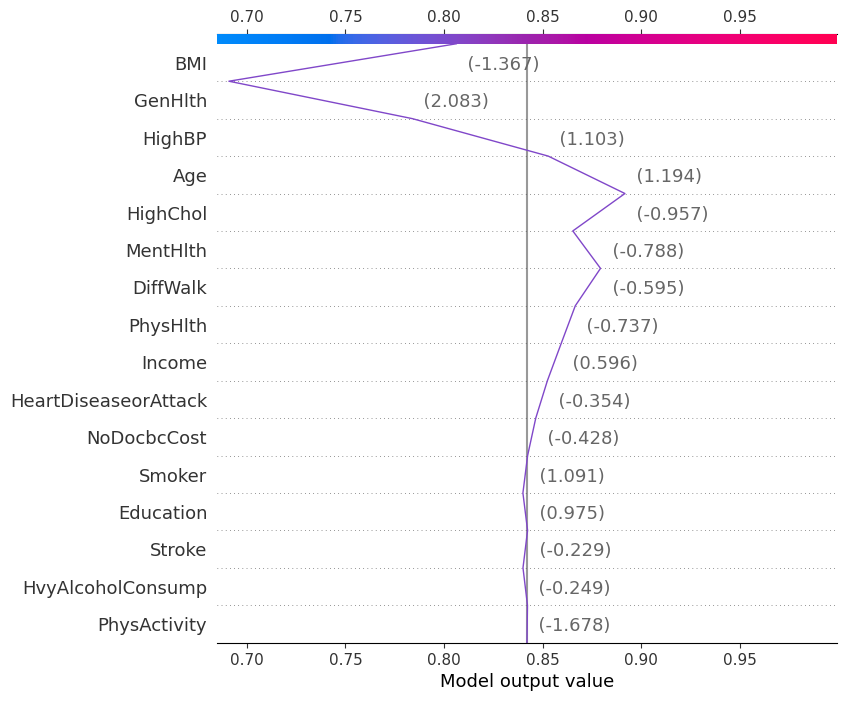

In [98]:
shap.decision_plot(tree_shap_explainer.expected_value[0], 
                tree_shap_values[0][3,:], X_test.iloc[3,:])

## Conclusion

This illness, which was formerly known as the "disease of the rich" and "slow killer," now affects people of all ages and socioeconomic backgrounds. This could be explained by increased consumption of foods that cause diabetes and easier access to cheap junk food. 

Families' eating habits and patterns may alter as socioeconomic conditions improve. Less physical activity and exercise, as well as the outsourcing of tasks around the house that would normally have been done by the individual, can occasionally be a result of higher wealth. Increased rates of obesity, stress-related smoking, and increased adherence to unhealthy lifestyles could all have a cascading influence on the prevalence of diabetes.

By harming the blood arteries, diabetes also raises the risk of high blood pressure. Many times, people with high blood pressure do not yet have a diabetes diagnosis. With this in mind, it seems logical that **high blood pressure and BMI are the two best indicators of diabetes risk**, while other risk factors include income, education, and physical activity.

## References

Refered the following links to understand the functions or the processes that are going to be required during the problem analysis.
    
    1. Scikit-learn Documentation
        
    2. Pandas Official Documentation
    
    3. Analytics Vidya
    
    4. medium: towardsdatascience
    
    5. Seaborn: statistical data visualization
    
All the visualization code was referred form the **seaborn** and **scikit-learn** official documentations. **Data frame** functions and usage was referred from the **Pandas** official documentation. All the concepts and doubts in the machine learning cleared with the help of **medium(towardsdatascience)** and **analytics vidya** articles. Rest of the code is written individually.

Copyright 2022 Naga Venkatesh Gavini

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.